# Project: Linear Regression on the Bicycle data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv("../data/train.csv", index_col=0)
df_test  = pd.read_csv("../data/test.csv", index_col=0)

df.shape, df_test.shape

((10886, 11), (6493, 8))

## 1. Data Exploration

In [3]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
df_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014


### Data Fields

* datetime - hourly date + timestamp  
* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weather -
    * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* count - number of total rentals (Dependent Variable)


In [6]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6+ KB


In [8]:
df[["season", "holiday", "workingday"]].groupby("season").describe()

holiday                                              workingday  \
         count      mean       std  min  25%  50%  75%  max      count   
season                                                                   
1       2686.0  0.026433  0.160450  0.0  0.0  0.0  0.0  1.0     2686.0   
2       2733.0  0.017563  0.131381  0.0  0.0  0.0  0.0  1.0     2733.0   
3       2733.0  0.035126  0.184133  0.0  0.0  0.0  0.0  1.0     2733.0   
4       2734.0  0.035113  0.184100  0.0  0.0  0.0  0.0  1.0     2734.0   

                                                     
            mean       std  min  25%  50%  75%  max  
season                                               
1       0.680566  0.466344  0.0  0.0  1.0  1.0  1.0  
2       0.692645  0.461482  0.0  0.0  1.0  1.0  1.0  
3       0.675082  0.468430  0.0  0.0  1.0  1.0  1.0  
4       0.675201  0.468385  0.0  0.0  1.0  1.0  1.0

In [9]:
df[["season", "temp", "atemp"]].groupby("season").describe()

temp                                                          \
         count       mean       std    min    25%    50%    75%    max   
season                                                                   
1       2686.0  12.530491  5.186492   0.82   9.02  12.30  16.40  29.52   
2       2733.0  22.823483  5.159616   9.84  18.86  22.96  26.24  38.54   
3       2733.0  28.789111  3.898157  15.58  26.24  28.70  31.16  41.00   
4       2734.0  16.649239  4.742176   5.74  13.12  16.40  20.50  30.34   

         atemp                                                               
         count       mean       std     min     25%     50%     75%     max  
season                                                                       
1       2686.0  15.228956  6.092218   0.760  10.605  14.395  20.455  32.575  
2       2733.0  26.647098  5.491321  11.365  22.725  26.515  31.060  43.940  
3       2733.0  32.540783  4.594888  12.120  30.305  33.335  35.605  45.455  
4       2734.0  20.059909  5.264197   7.575  15.910  20.455  24.240  34.090

In [10]:
df[["season", "humidity", "windspeed"]].groupby("season").describe()

humidity                                                       \
          count       mean        std   min   25%   50%   75%    max   
season                                                                 
1        2686.0  56.297841  20.158420   0.0  41.0  53.0  70.0  100.0   
2        2733.0  60.852909  20.179655  16.0  45.0  61.0  78.0  100.0   
3        2733.0  64.123674  17.217859  17.0  51.0  66.0  78.0  100.0   
4        2734.0  66.173738  17.813446  16.0  52.0  66.0  81.0  100.0   

       windspeed                                                               
           count       mean       std  min     25%      50%      75%      max  
season                                                                         
1         2686.0  14.636978  9.150257  0.0  7.0015  12.9980  19.9995  51.9987  
2         2733.0  13.405607  7.992956  0.0  7.0015  12.9980  19.0012  47.9988  
3         2733.0  11.508862  7.160605  0.0  7.0015  11.0014  15.0013  56.9969  
4         2734.0  11.678147  7.842632  0.0  7.0015  11.0014  16.9979  43.0006

In [11]:
df[["season", "casual", "registered"]].groupby("season").describe()

casual                                                     registered  \
         count       mean        std  min   25%   50%   75%    max      count   
season                                                                          
1       2686.0  15.489576  31.222498  0.0   1.0   5.0  15.0  367.0     2686.0   
2       2733.0  47.446762  57.649556  0.0   8.0  29.0  63.0  361.0     2733.0   
3       2733.0  52.220271  54.638059  0.0  10.0  36.0  74.0  350.0     2733.0   
4       2734.0  28.580834  42.596214  0.0   4.0  14.0  33.0  362.0     2734.0   

                                                                 
              mean         std  min   25%    50%     75%    max  
season                                                           
1       100.853686  108.082025  0.0  22.0   69.0  141.00  681.0  
2       167.804610  156.156658  0.0  39.0  133.0  243.00  782.0  
3       182.196853  164.386982  0.0  53.0  151.0  252.00  886.0  
4       170.407462  154.828357  1.0  46.0  139.0  238.75  857.0

In [12]:
df[["season", "count"]].groupby("season").describe()

count                                                        
         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

In [13]:
print(df["holiday"].value_counts())
print(df["weather"].value_counts())

0    10575
1      311
Name: holiday, dtype: int64
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


In [14]:
df[["season", "weather"]].groupby("weather").describe()

season                                             
          count      mean       std  min  25%  50%  75%  max
weather                                                     
1        7192.0  2.497080  1.101190  1.0  2.0  3.0  3.0  4.0
2        2834.0  2.530346  1.150498  1.0  1.0  2.0  4.0  4.0
3         859.0  2.509895  1.125393  1.0  2.0  2.0  4.0  4.0
4           1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0

### Explore the timestamps

In [15]:
dates = pd.to_datetime(df.index)
dates_test = pd.to_datetime(df_test.index)

In [16]:
print("Day names: ", np.unique(dates.day_name()))
print("Years: ", np.unique(dates.year))
print("Months: ", np.unique(dates.month))
print("Days: ", np.unique(dates.day))
print("Hours: ", np.unique(dates.hour))
print("Minutes: ", np.unique(dates.minute))
print("Seconds: ", np.unique(dates.second))

Day names:  ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Years:  [2011 2012]
Months:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Days:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Hours:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Minutes:  [0]
Seconds:  [0]


In [17]:
print("Day names: ", np.unique(dates_test.day_name()))
print("Years: ", np.unique(dates_test.year))
print("Months: ", np.unique(dates_test.month))
print("Days: ", np.unique(dates_test.day))
print("Hours: ", np.unique(dates_test.hour))
print("Minutes: ", np.unique(dates_test.minute))
print("Seconds: ", np.unique(dates_test.second))

Day names:  ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
Years:  [2011 2012]
Months:  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Days:  [20 21 22 23 24 25 26 27 28 29 30 31]
Hours:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Minutes:  [0]
Seconds:  [0]


### Observation 1:

This is the data from 2011 - 2012. The timestamps are hourly taken and minute and second is always zero. The train data runs for every month between the days 1 - 19 and the test data is the other part of the month 20 - 31.

The index is not in the format timestamp. Convert it!

In [18]:
df.index = pd.to_datetime(df.index)
df_test.index = pd.to_datetime(df_test.index)

df.index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday'],
      dtype='object', name='datetime', length=10886)

In [19]:
df[["count", "registered"]].groupby(by=[df.index.year, df.index.month]).describe()

count                                                     \
                   count        mean         std  min    25%    50%     75%   
datetime datetime                                                             
2011     1         431.0   54.645012   47.606250  1.0  15.50   47.0   79.00   
         2         446.0   73.641256   63.572141  1.0  21.25   59.0  109.75   
         3         446.0   86.849776   79.278388  1.0  18.00   72.0  123.75   
         4         455.0  111.026374  102.163250  1.0  25.00   84.0  165.50   
         5         456.0  174.809211  144.160643  1.0  50.00  154.0  261.00   
         6         456.0  196.877193  151.296297  1.0  70.50  172.0  309.50   
         7         456.0  203.614035  153.082654  1.0  70.50  173.0  317.25   
         8         456.0  182.666667  146.661600  1.0  61.00  159.0  271.75   
         9         453.0  174.622517  144.877431  1.0  45.00  147.0  280.00   
         10        455.0  174.773626  149.749304  1.0  52.50  140.0  248.00   
         11        456.0  155.458333  129.374278  1.0  45.75  133.5  228.75   
         12        456.0  134.173246  113.485627  1.0  33.00  110.5  206.00   
2012     1         453.0  124.353201  114.946616  1.0  32.00   93.0  181.00   
         2         455.0  145.646154  131.784817  1.0  35.50  118.0  215.00   
         3         455.0  208.276923  185.387528  1.0  50.50  171.0  301.50   
         4         454.0  257.455947  213.266556  1.0  64.00  233.5  389.25   
         5         456.0  264.109649  216.759524  1.0  69.75  234.5  389.50   
         6         456.0  287.186404  229.811672  4.0  75.50  254.5  458.75   
         7         456.0  267.037281  207.291102  2.0  90.75  244.0  382.00   
         8         456.0  285.570175  225.929425  3.0  85.00  260.0  433.00   
         9         456.0  292.598684  243.510415  3.0  77.75  245.5  462.25   
         10        456.0  280.508772  235.212983  2.0  74.75  239.5  400.00   
         11        455.0  231.980220  187.447854  1.0  70.50  202.0  358.00   
         12        456.0  217.054825  179.883538  1.0  63.75  192.0  313.00   

                         registered                                      \
                     max      count        mean         std  min    25%   
datetime datetime                                                         
2011     1         219.0      431.0   49.986079   45.301879  0.0  13.00   
         2         327.0      446.0   65.174888   57.061417  0.0  20.00   
         3         332.0      446.0   69.114350   63.090788  0.0  15.00   
         4         452.0      455.0   84.149451   79.210335  0.0  21.50   
         5         611.0      456.0  140.017544  122.065915  1.0  39.00   
         6         638.0      456.0  153.894737  124.500046  1.0  59.00   
         7         596.0      456.0  146.278509  118.180469  1.0  49.50   
         8         600.0      456.0  144.114035  124.696362  0.0  48.75   
         9         628.0      453.0  134.200883  115.584995  0.0  33.00   
         10        625.0      455.0  137.061538  117.736792  1.0  41.50   
         11        553.0      456.0  133.188596  113.664571  1.0  38.75   
         12        477.0      456.0  123.035088  106.154702  1.0  30.00   
2012     1         512.0      453.0  112.777042  104.892660  1.0  29.00   
         2         539.0      455.0  133.512088  123.203064  1.0  32.50   
         3         801.0      455.0  170.593407  152.103125  1.0  45.00   
         4         822.0      454.0  196.698238  171.136660  1.0  53.00   
         5         873.0      456.0  208.364035  177.861816  1.0  57.00   
         6         869.0      456.0  223.646930  188.119895  3.0  60.50   
         7         872.0      456.0  212.646930  178.263098  1.0  70.50   
         8         897.0      456.0  223.530702  190.523718  3.0  66.75   
         9         977.0      456.0  232.094298  203.017192  3.0  61.75   
         10        948.0      456.0  234.614035  204.534497  1.0  63.50   
         1

<AxesSubplot:xlabel='datetime,datetime'>

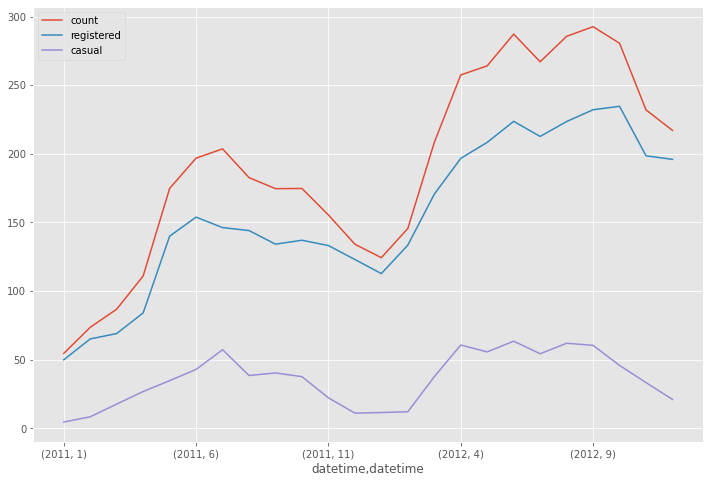

In [20]:
df[["count", "registered", "casual"]].groupby(by=[df.index.year, df.index.month]).mean().plot()

In [21]:
np.unique(df["casual"] + df["registered"] - df["count"])   ### LINEARLY DEPENDENCE

array([0])

<AxesSubplot:xlabel='datetime,datetime'>

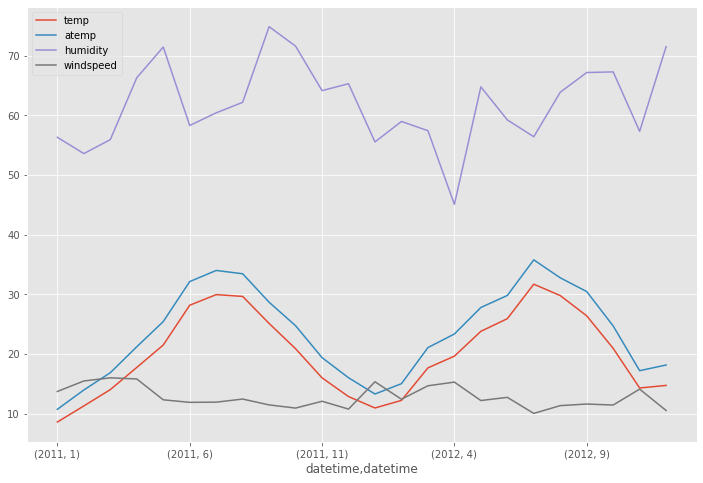

In [22]:
df[["temp", "atemp", "humidity", "windspeed"]].groupby(by=[df.index.year, df.index.month]).mean().plot()

In [23]:
df[["holiday", "workingday"]].groupby(by=[df.index.year, df.index.month]).sum()

holiday  workingday
datetime datetime                     
2011     1              24         264
         2               0         327
         3               0         328
         4              24         287
         5               0         336
         6               0         312
         7              24         288
         8               0         360
         9              24         285
         10             24         287
         11             24         312
         12              0         312
2012     1              47         286
         2               0         311
         3               0         312
         4              24         310
         5               0         336
         6               0         312
         7              24         312
         8               0         312
         9              24         288
         10             24         336
         11             24         287
         12              0         312

<AxesSubplot:xlabel='humidity', ylabel='count'>

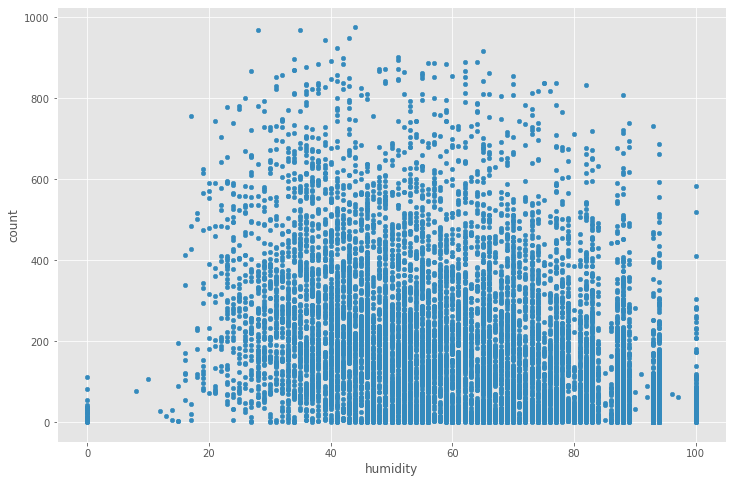

In [24]:
df.plot(x="humidity", y="count", kind="scatter")


### Observation 2: 

* temp and atemp seem to be almost shifted to each other. There is no data for each hour.
* registered + casual = count
* Sa/So are neither workingday nor holidays
* humidity of zero is impossible and have to be filled by something (mean)


In [25]:
df[["holiday", "workingday", "count"]].groupby(by=["holiday", "workingday"]).mean()

count
holiday workingday            
0       0           188.765096
        1           193.011873
1       0           185.877814

# 2. Feature Engineering

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [27]:
#sns.heatmap(df.corr(), annot=True)

Drop values with high correlation. Here atemp.

### Drop and introduce new columns from datetime

In [28]:
df_fe = df.copy()

df_fe["hour"] = df_fe.index.hour
df_fe["day"] = df_fe.index.dayofweek
df_fe["month"] = df_fe.index.month
df_fe["year"] = df_fe.index.year

df_fe['peak'] = df_fe[['hour', 'workingday']]\
    .apply(lambda df: 1 if ((df['workingday'] == 1 and (7< df['hour'] <= 10 or 17 <= df['hour'] <= 18)) \
                            or (df['workingday'] == 0 and 10 <= df['workingday'] <= 19)) else 0, axis = 1)

In [29]:
#days = ["monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday"]
#for i in range(7):
#    df_fe[df_fe["day"]==i][["count", "hour"]].groupby("hour").mean().plot(title="a typical " + days[i])

In [30]:
df_fe = df_fe.reset_index()
df_fe = df_fe.drop(["holiday", "workingday", "datetime",  "registered", "casual", "atemp"], axis=1)

In [31]:
df_fe[df_fe["humidity"]==0]["humidity"] = df_fe["humidity"].mean()

/var/folders/bc/p8pwxkb10pjcq91bmqqt15hr0000gn/T/ipykernel_34565/3113822496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fe[df_fe["humidity"]==0]["humidity"] = df_fe["humidity"].mean()


### Divide in Test and Train

In [32]:
X = df_fe.drop(labels=["count"], axis=1)
y = df_fe["count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train.head()

,season,weather,temp,humidity,windspeed,hour,day,month,year,peak
3036,3,2,27.06,61,11.0014,10,4,7,2011,1
4817,4,1,20.50,29,23.9994,19,6,11,2011,0
5745,1,1,9.02,44,19.0012,13,5,1,2012,0
2327,2,2,27.06,47,7.0015,21,5,6,2011,0
2838,3,1,26.24,89,7.0015,4,3,7,2011,0


### Rescaling

In [33]:
import sklearn
sklearn.set_config(display="diagram")

In [34]:
num_col = ["temp", "humidity", "windspeed"]
cat_col = ["weather", "season", "day", "month", "year", "hour"]

scaler = ColumnTransformer([
    ('mm', MinMaxScaler(), num_col),
    ('ohe', OneHotEncoder(sparse=False, drop="first"), cat_col)
], remainder="passthrough")

scaler.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mm', MinMaxScaler(),
                                 ['temp', 'humidity', 'windspeed']),
                                ('ohe',
                                 OneHotEncoder(drop='first', sparse=False),
                                 ['weather', 'season', 'day', 'month', 'year',
                                  'hour'])])

In [35]:
df_fe.columns
names = np.char.lstrip(np.array(scaler.get_feature_names_out(), dtype=str), "mm")
names = np.char.lstrip(names, "ohe")
names = np.char.lstrip(names, "remainder")
names = np.char.lstrip(names, "__")
names

array(['temp', 'humidity', 'windspeed', 'weather_2', 'weather_3',
       'weather_4', 'season_2', 'season_3', 'season_4', 'day_1', 'day_2',
       'day_3', 'day_4', 'day_5', 'day_6', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'year_2012', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'peak'], dtype='<U15')

In [36]:
X_train_fe = pd.DataFrame(scaler.transform(X_train), columns=names)
X_test_fe  = pd.DataFrame(scaler.transform(X_test), columns=names)

In [37]:
X_train_fe.head()

,temp,humidity,windspeed,weather_2,weather_3,weather_4,season_2,season_3,season_4,day_1,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,peak
0,0.653061,0.61,0.193018,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.489796,0.29,0.421065,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.204082,0.44,0.333373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.653061,0.47,0.122840,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.632653,0.89,0.122840,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
X_train_fe.columns

Index(['temp', 'humidity', 'windspeed', 'weather_2', 'weather_3', 'weather_4',
       'season_2', 'season_3', 'season_4', 'day_1', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2012', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'peak'],
      dtype='object')

### Binning


In [39]:
#labels = ["morning", "rush hour 1", "midday", "rush hour 2", "night"]

#X_train_2 = X_train_fe.copy()
#t = pd.cut(X_train_2["hour"], bins=[0, 7, 10, 15, 20, 23], 
#       include_lowest=True, labels=labels)

#X_train_2["hour bins"] = t

In [40]:
#labels = ["morning", "rush hour 1", "midday", "rush hour 2", "night"]
#

#X_test_2 = X_test_fe.copy()
#t = pd.cut(X_test_2["hour"], bins=[0, 7, 10, 15, 20, 23], 
#       include_lowest=True, labels=labels)

#X_test_2["hour bins"] = t


In [41]:
#ohe = OneHotEncoder(sparse=False)
#ohe.fit(X_train_2[["hour bins"]])
#names = ohe.get_feature_names_out()

#t = ohe.transform(X_train_2[["hour bins"]])
#X_train_3 = pd.concat([X_train_2, pd.DataFrame(t, columns=names)], axis=1)
#X_train_3 = X_train_3.drop(labels=["hour bins"], axis=1)

In [42]:
#t = ohe.transform(X_test_2[["hour bins"]])
#X_test_3 = pd.concat([X_test_2, pd.DataFrame(t, columns=names)], axis=1)
#X_test_3 = X_test_3.drop(labels=["hour bins"], axis=1)

In [43]:
#X_test_3.head()

In [44]:
hour = ["hour_" + str(i) for i in range(1, 24)]

X_train_fe.isna().sum()

temp         0
humidity     0
windspeed    0
weather_2    0
weather_3    0
weather_4    0
season_2     0
season_3     0
season_4     0
day_1        0
day_2        0
day_3        0
day_4        0
day_5        0
day_6        0
month_2      0
month_3      0
month_4      0
month_5      0
month_6      0
month_7      0
month_8      0
month_9      0
month_10     0
month_11     0
month_12     0
year_2012    0
hour_1       0
hour_2       0
hour_3       0
hour_4       0
hour_5       0
hour_6       0
hour_7       0
hour_8       0
hour_9       0
hour_10      0
hour_11      0
hour_12      0
hour_13      0
hour_14      0
hour_15      0
hour_16      0
hour_17      0
hour_18      0
hour_19      0
hour_20      0
hour_21      0
hour_22      0
hour_23      0
peak         0
dtype: int64

### Polynomial features

In [45]:
polies = ["temp", "humidity", "peak"] + hour
print(polies)
pt = ColumnTransformer([
    ("p", PolynomialFeatures(degree=2, include_bias=False, interaction_only=False), polies),   
], remainder = "passthrough")

['temp', 'humidity', 'peak', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']


In [46]:
pt.fit(X_train_fe)

new_names = np.array(pt.get_feature_names_out(), dtype=str)
new_names = np.char.lstrip(new_names, "p")
new_names = np.char.lstrip(new_names, "remainder")
new_names = np.char.lstrip(new_names, "__")

X_train_p = pd.DataFrame(pt.transform(X_train_fe), columns=new_names)
X_test_p  = pd.DataFrame(pt.transform(X_test_fe), columns=new_names)

In [47]:
X_train_p.head()

,temp,humidity,peak,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2012
0,0.653061,0.61,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.489796,0.29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.204082,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.653061,0.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.632653,0.89,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Find important features with RandomForest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.metrics import mean_squared_log_error

In [49]:
#rf = RandomForestRegressor()
#rf.fit(X_train_p, y_train)


In [50]:
#ypred = rf.predict(X_train_p)
#ypred_t = rf.predict(X_test_p)
#print("RMSLE train/test: ", mean_squared_log_error(y_train, ypred, squared=False),
#                       mean_squared_log_error(y_test, ypred_t, squared=False))



#print(rf.score(X_train_p, y_train))
#print(rf.score(X_test_p, y_test))

#dict(zip(X_train_p.columns, rf.feature_importances_))

# 3. Linear Regression

## 3.1 Train the model

In [51]:
def linreg(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    ypred = model.predict(X_train)
    ypred_t = model.predict(X_test)
    
    ypred_t[ypred_t<0] = 0
    ypred[ypred<0] = 0
    print(type(model).__name__)
    print("------------------------")
    print("R2 train/test: ", m.score(X_train_p, y_train), m.score(X_test_p, y_test))
    print("RMSLE train/test: ", mean_squared_log_error(y_train, ypred, squared=False),
                       mean_squared_log_error(y_test, ypred_t, squared=False))
    print("\n")
    

In [52]:
m = LinearRegression()
m_ridge = Ridge(alpha=20)
m_lasso = Lasso(alpha=1)
#m_enet = ElasticNet(alpha=1)  

In [53]:
linreg(m, X_train_p, y_train, X_test_p, y_test)
linreg(m_ridge, X_train_p, y_train, X_test_p, y_test)
linreg(m_lasso, X_train_p, y_train, X_test_p, y_test)


LinearRegression
------------------------
R2 train/test:  0.8019891471753122 0.7907182075071757
RMSLE train/test:  1.093428345959668 1.1038962858394947


Ridge
------------------------
R2 train/test:  0.8019891471753122 0.7907182075071757
RMSLE train/test:  1.0623611966067485 1.0934839255937785


Lasso
------------------------
R2 train/test:  0.8019891471753122 0.7907182075071757
RMSLE train/test:  1.0199226554928669 1.0585362007742842




## 3.2 Cross-Validation

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
cross_r2_lin = cross_val_score(m_ridge, X_train_p, y_train, cv=10, scoring ='r2', verbose=3)

[CV] END ................................ score: (test=0.765) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] END ................................ score: (test=0.790) total time=   0.0s
[CV] END ................................ score: (test=0.777) total time=   0.0s
[CV] END ................................ score: (test=0.801) total time=   0.0s
[CV] END ................................ score: (test=0.793) total time=   0.0s
[CV] END ................................ score: (test=0.772) total time=   0.0s
[CV] END ................................ score: (test=0.766) total time=   0.0s
[CV] END ................................ score: (test=0.768) total time=   0.0s
[CV] END ................................ score: (test=0.767) total time=   0.0s
[CV] END ................................ score: (test=0.786) total time=   0.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


In [56]:
cross_r2_lin.mean()

0.7785232839411858

## 3.3 GridSearchCV

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
parameters = {'alpha' : [2 ** i for i in range(1, 5)]
}

In [59]:
grid_cv = GridSearchCV(estimator=m_ridge,
                       param_grid = parameters,
                       cv = 5,
                       scoring = "r2",
                       verbose = 3
)

In [60]:
grid_cv.fit(X_train_p, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...........................alpha=2;, score=0.789 total time=   0.0s
[CV 2/5] END ...........................alpha=2;, score=0.805 total time=   0.0s
[CV 3/5] END ...........................alpha=2;, score=0.796 total time=   0.0s
[CV 4/5] END ...........................alpha=2;, score=0.783 total time=   0.0s
[CV 5/5] END ...........................alpha=2;, score=0.795 total time=   0.0s
[CV 1/5] END ...........................alpha=4;, score=0.787 total time=   0.0s
[CV 2/5] END ...........................alpha=4;, score=0.802 total time=   0.0s
[CV 3/5] END ...........................alpha=4;, score=0.794 total time=   0.0s
[CV 4/5] END ...........................alpha=4;, score=0.780 total time=   0.0s
[CV 5/5] END ...........................alpha=4;, score=0.791 total time=   0.0s
[CV 1/5] END ...........................alpha=8;, score=0.783 total time=   0.0s
[CV 2/5] END ...........................alpha=8;,

GridSearchCV(cv=5, estimator=Ridge(alpha=20),
             param_grid={'alpha': [2, 4, 8, 16]}, scoring='r2', verbose=3)

In [61]:
def print_results(results):
    print('BEST MODEL PARAMETERS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    for mean, params in zip(means, results.cv_results_['params']):
        print('{}  for {}'.format(round(mean, 4), params))

In [62]:
pred = m.predict(X_train_p)
print(pred[pred<0])
print(y_train[pred<0])

[-5.28126740e+01 -9.47306428e+01 -8.08478303e+01 -8.97540803e+01
 -9.78533030e+00 -2.62792457e+01 -4.45068340e+01 -3.06759553e+01
 -7.13790803e+01 -4.92039492e+00 -4.82853303e+01 -3.91033030e+00
 -2.84783030e+00 -4.87908030e+00 -4.55353303e+01 -3.98790803e+01
 -4.34944221e+01 -4.24095983e+01 -3.22393326e+00 -4.77853303e+01
 -5.06618901e+01 -4.50500775e+01 -1.77206926e+01 -8.36290803e+01
 -1.66251498e+01 -4.30721603e+01 -3.06567695e+01 -1.85111513e-01
 -3.48165803e+01 -3.39728303e+01 -6.18260412e+01 -3.15883991e+01
 -4.02228303e+01 -1.16759553e+01 -5.28456699e+01 -8.48048638e+00
 -4.65978303e+01 -5.94728303e+01 -3.24392800e-01 -1.98015533e+01
 -6.66943354e+01 -1.95040803e+01 -1.29863598e+01 -1.83165803e+01
 -1.39975684e+01 -1.45978303e+01 -7.71290803e+01 -4.23165803e+01
 -3.75607123e+01 -7.57228303e+01 -4.97540803e+01 -6.25665803e+01
 -1.78533030e+00 -3.55040803e+01 -2.30520102e+01 -3.53282990e+01
 -5.09728303e+01 -4.16056428e+01 -6.40452800e+01 -3.04684473e+01
 -1.86309577e+00 -4.73547

In [63]:
print_results(grid_cv)

BEST MODEL PARAMETERS: {'alpha': 2}

0.7935  for {'alpha': 2}
0.7909  for {'alpha': 4}
0.7866  for {'alpha': 8}
0.7798  for {'alpha': 16}


In [64]:
from sklearn.metrics import make_scorer

def rmsle(pred, true):
    pred[pred<0] = 
    return mean_squared_log_error(pred, true, squared=False)

scorer = make_scorer(rmsle, greater_is_better=False)

SyntaxError: invalid syntax (2456519613.py, line 4)

In [ ]:
grid_cv = GridSearchCV(estimator=m_ridge,
                       param_grid = parameters,
                       cv = 5,
                       scoring = 'neg_mean_squared_error',
                       verbose = 3
)

In [ ]:
grid_cv.fit(X_train_p, y_train)

In [ ]:
sklearn.metrics.SCORERS.keys()

In [ ]:
print_results(grid_cv)

In [ ]:
a = np.array(